<a href="https://colab.research.google.com/github/snehotosh/Deep-Learning/blob/master/3_MNIST_CNN_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function

!pip install tensorflow-gpu==2.0.0-alpha0

    100% |████████████████████████████████| 332.1MB 71kB/s 
    100% |████████████████████████████████| 3.0MB 8.2MB/s 
    100% |████████████████████████████████| 419kB 12.6MB/s 
    100% |████████████████████████████████| 61kB 24.0MB/s 


In [0]:
# https://www.tensorflow.org/tutorials/keras/basic_classification

In [0]:
# Import necessary Modules
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.datasets import fashion_mnist

In [3]:
# Import
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


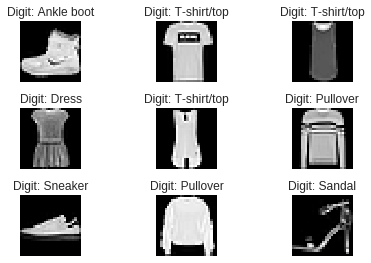

In [6]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(class_names[y_train[i]]))
  plt.xticks([])
  plt.yticks([])


In [0]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [0]:
x_train = x_train/255.
x_test = x_test/255.

In [9]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
#Building Sequential Model Architecture
model = models.Sequential()
#----------------------------------------------------------------------------
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#----------------------------------------------------------------------------
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
#----------------------------------------------------------------------------
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [0]:
# Compiling the model
# https://jovianlin.io/cat-crossentropy-vs-sparse-cat-crossentropy/
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
# Model fitting
history = model.fit(x=x_train,y=y_train,epochs=30,verbose=1,validation_data=(x_test, y_test),batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 14s 236us/sample - loss: 0.4664 - accuracy: 0.8322 - val_loss: 0.3165 - val_accuracy: 0.8864
Epoch 2/30
60000/60000 [==============================] - 11s 177us/sample - loss: 0.2757 - accuracy: 0.8984 - val_loss: 0.2597 - val_accuracy: 0.9028
Epoch 3/30
60000/60000 [==============================] - 11s 179us/sample - loss: 0.2308 - accuracy: 0.9153 - val_loss: 0.2448 - val_accuracy: 0.9113
Epoch 4/30
60000/60000 [==============================] - 11s 178us/sample - loss: 0.1985 - accuracy: 0.9262 - val_loss: 0.2242 - val_accuracy: 0.9162
Epoch 5/30
60000/60000 [==============================] - 11s 179us/sample - loss: 0.1716 - accuracy: 0.9355 - val_loss: 0.2346 - val_accuracy: 0.9160
Epoch 6/30
60000/60000 [==============================] - 11s 180us/sample - loss: 0.1504 - accuracy: 0.9449 - val_loss: 0.2240 - val_accuracy: 0.9241
Epoch 7/30
60000/60000 [====================

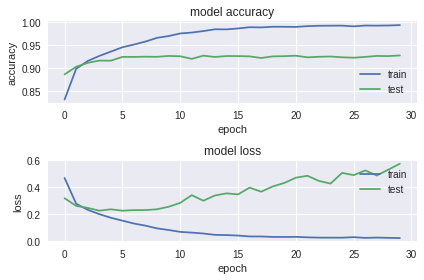

In [14]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

**The above graph is showing a overfitting behavior**

In [15]:
loss_and_metrics = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 174us/sample - loss: 0.5723 - accuracy: 0.9273


In [16]:
print('Test Accuracy:',loss_and_metrics[1])
print('Test Loss:',loss_and_metrics[0])

Test Accuracy: 0.9273
Test Loss: 0.5722761352041038


In [0]:
predicted_classes = model.predict_classes(x_test)

In [18]:
# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0] # return the index of matching elements
incorrect_indices = np.nonzero(predicted_classes != y_test)[0] # return the index of non-matching elements
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")



9273  classified correctly
727  classified incorrectly


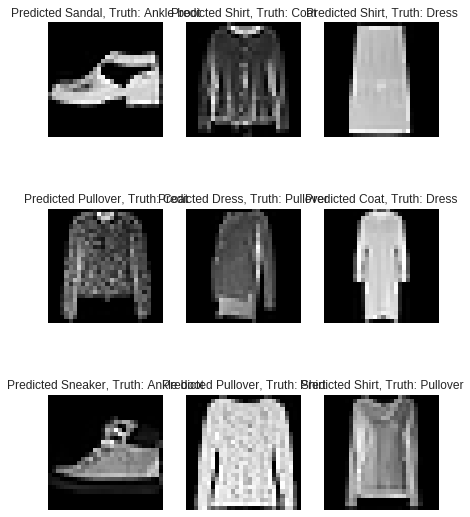

In [26]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,20)

figure_evaluation = plt.figure()

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(class_names[predicted_classes[incorrect]], 
                                       class_names[y_test[incorrect]]))
    plt.xticks([])
    plt.yticks([])
